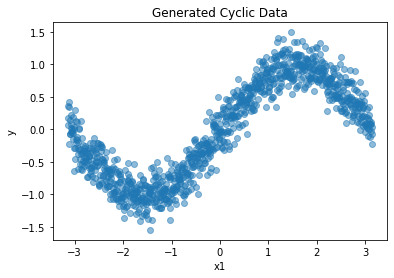

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Number of observations
n = 1000

# Generate cyclic data
x1 = np.linspace(-np.pi, np.pi, n)
y = np.sin(x1) + np.random.normal(0, 0.2, n)

# Generate random data for another variable
x2 = np.random.normal(0, 1, n)

# Create a pandas DataFrame
df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# Visualize the data
plt.scatter(df['x1'], df['y'], alpha=0.5)
plt.title('Generated Cyclic Data')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()


In [12]:
import statsmodels.api as sm

# Add a constant to the DataFrame for the OLS regression
df = sm.add_constant(df)

# Define weights
weights = np.random.rand(n)

# Define the model
model = sm.WLS(df['y'], df[['const', 'x1', 'x2']], weights=weights)

# Fit the model
results = model.fit()

# Print the summary
# print(results.summary())


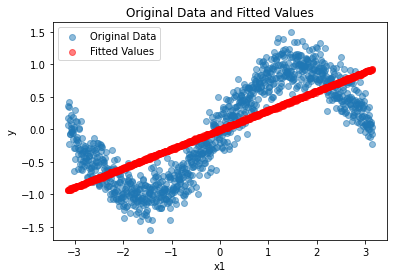

In [13]:
# Predict the y-values
df['y_pred'] = results.predict(df[['const', 'x1', 'x2']])

# Plot the original data
plt.scatter(df['x1'], df['y'], alpha=0.5, label='Original Data')

# Plot the fitted values
plt.scatter(df['x1'], df['y_pred'], color='red', alpha=0.5, label='Fitted Values')

plt.title('Original Data and Fitted Values')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()


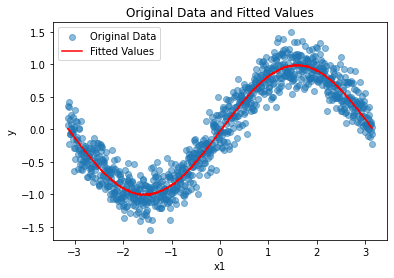

In [14]:
# Add sin and cos transformations of x1 to the DataFrame
df['sin_x1'] = np.sin(df['x1'])
df['cos_x1'] = np.cos(df['x1'])

# Define the model
model = sm.WLS(df['y'], df[['const', 'sin_x1', 'cos_x1', 'x2']], weights=weights)

# Fit the model
results = model.fit()

# Predict the y-values
df['y_pred'] = results.predict(df[['const', 'sin_x1', 'cos_x1', 'x2']])

# Plot the original data
plt.scatter(df['x1'], df['y'], alpha=0.5, label='Original Data')

# Plot the fitted values - need to sort values for a continuous line
df_sorted = df.sort_values('x1')
plt.plot(df_sorted['x1'], df_sorted['y_pred'], color='red', label='Fitted Values')

plt.title('Original Data and Fitted Values')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()
